# How to recover the first TESS planet candidate with *Lightkurve*?

Recently, the first public pixel data from the TESS mission have become [available from the data archive at MAST](https://archive.stsci.edu/prepds/tess-data-alerts/). This tutorial demonstrates how the [Lightkurve Python package](http://lightkurve.keplerscience.org) can be used to read in these data and create your own TESS light curves with different aperture masks.

Below is a quick tutorial on how to get started using *Lightkurve* and TESS data. We'll use the nearby, bright target Pi Mensae (ID 261136679), around which the mission team recently discovered a short period planet candidate on a 6.27 day orbit. See the [pre-print paper by Huang et al (2018)](https://arxiv.org/abs/1809.05967) for more details.

TESS data is stored in a binary file format which is documented in the [TESS Science Data Products Description Document](https://archive.stsci.edu/missions/tess/doc/EXP-TESS-ARC-ICD-TM-0014.pdf). *Lightkurve* provides a `TessTargetPixelFile` class which allows you to interact with the data easily.



In [1]:
from lightkurve import TessTargetPixelFile
tpf = TessTargetPixelFile('https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00261136679-s01_tess_v1_tp.fits')

`TessTargetPixelFile`'s have many helpful methods and attributes. For example, you can access basic meta data on the target easily:

In [2]:
tpf.mission

'TESS'

In [3]:
tpf.targetid  # TESS Input Catalog (TIC) Identifier

261136679

In [4]:
tpf.sector  # TESS Observation Sector

1

In [5]:
tpf.camera  # TESS Camera Number

4

In [6]:
tpf.ccd  # TESS CCD Number

2

We might want to plot the data, we can do this with the `plot()` method. You can add the keyword `aperture_mask` to plot an aperture on top of the image. In this case we've used the `pipeline_mask` which is stored in the original .fits file, but you can use any aperture you like.

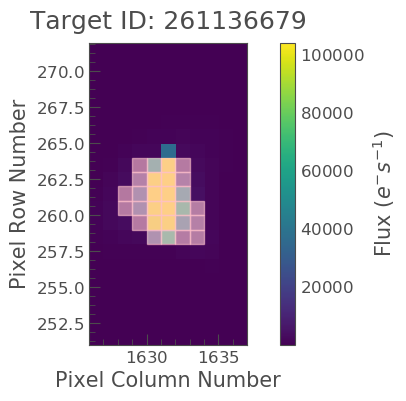

In [7]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask);

If you want to access the original fits file that generated the data you can use the `hdu` attribute of the tpf. This will return an `astropy.io.fits` object, for example

In [8]:
tpf.hdu

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f8bb363ee80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8bb3663ef0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f8badca7400>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8badbbc320>]

You can access each extension and the data inside it in the same way you'd use `astropy.io.fits`. If you want to access data held in the TPF, such as the time of the observations, you can do that easily by using

In [9]:
tpf.time

array([1325.29698328, 1325.29837215, 1325.29976102, ..., 1353.17292214,
       1353.17431099, 1353.17569985])

This returns the time in units of days counted since [Julian Day](https://en.wikipedia.org/wiki/Julian_day) 2457000.  

You can access the corresponding flux values using

In [10]:
tpf.flux

array([[[  -1.3825388,  -37.66533  ,  -91.830536 , ..., -108.04645  ,
         -103.54175  , -134.1816   ],
        [-135.68407  , -125.30367  , -112.52773  , ..., -113.03839  ,
         -122.92997  , -131.28302  ],
        [-147.63722  , -142.73625  , -134.99854  , ..., -101.330734 ,
         -114.31767  , -121.03055  ],
        ...,
        [-138.13503  , -137.8448   , -146.29425  , ...,  -77.273094 ,
         -105.22347  , -135.82652  ],
        [-142.20255  , -139.6766   , -147.65201  , ..., -118.81814  ,
         -129.52805  , -130.46175  ],
        [-133.71326  , -134.32669  , -148.82013  , ..., -127.16725  ,
          -90.90953  , -112.974434 ]],

       [[  -3.390986 ,  -47.140965 ,  -90.53796  , ..., -106.87563  ,
         -108.55464  , -136.6413   ],
        [-133.7175   , -125.38933  , -114.30842  , ..., -115.82087  ,
         -125.8608   , -132.87209  ],
        [-147.48918  , -142.87836  , -138.43767  , ..., -103.16773  ,
         -116.372955 , -119.86726  ],
        ...,


Flux is a `numpy.ndarray` with a shape of (TIME x PIXELS x PIXELS). If you want to access just the first frame you can use

In [11]:
tpf.flux[0]

array([[-1.38253880e+00, -3.76653290e+01, -9.18305359e+01,
        -1.29922272e+02, -1.45692978e+02, -1.35893311e+02,
        -9.54683685e+01, -8.85729370e+01, -1.08046448e+02,
        -1.03541748e+02, -1.34181595e+02],
       [-1.35684067e+02, -1.25303673e+02, -1.12527733e+02,
        -1.35690414e+02, -1.45928650e+02, -1.27757614e+02,
        -6.09818077e+01, -7.37526398e+01, -1.13038391e+02,
        -1.22929970e+02, -1.31283020e+02],
       [-1.47637222e+02, -1.42736252e+02, -1.34998535e+02,
        -1.41663147e+02, -1.40064377e+02, -1.18161720e+02,
        -5.37216644e+01, -6.23722382e+01, -1.01330734e+02,
        -1.14317673e+02, -1.21030548e+02],
       [-1.49992447e+02, -1.43351776e+02, -1.39589264e+02,
        -1.37442719e+02, -1.31207718e+02, -9.68078690e+01,
        -1.37817793e+01, -3.41951828e+01, -7.66406403e+01,
        -8.33256989e+01, -8.85187225e+01],
       [-1.37578445e+02, -1.28364151e+02, -1.26376915e+02,
        -1.21656555e+02, -1.14596848e+02, -5.06528702e+01,
  

These values are in units electrons per second.

## Building Light Curves from TPFs

We can use the `to_lightcurve()` method to turn this TPF into a light curve using *Simple Aperture Photometry*. This will put an aperture on the target, and sum up the flux in all the pixels inside the aperture. 

The default for `to_lightcurve()` is to use the mask generated by the TESS pipeline.

In [12]:
lc = tpf.to_lightcurve()

Now we can use the plot function to take a look at the data.

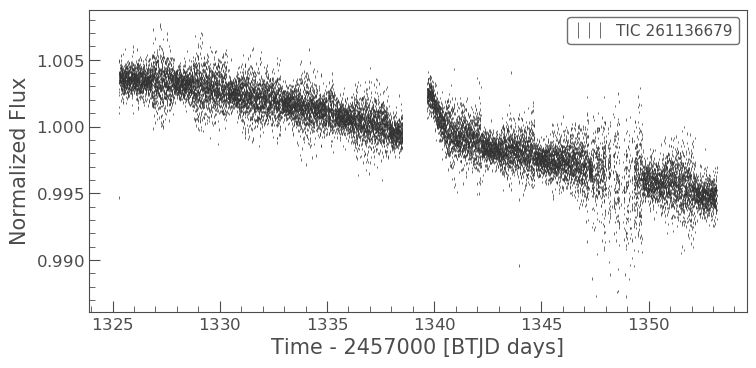

In [13]:
lc.errorbar();

This looks pretty good, but maybe we can improve things by creating a new aperture.

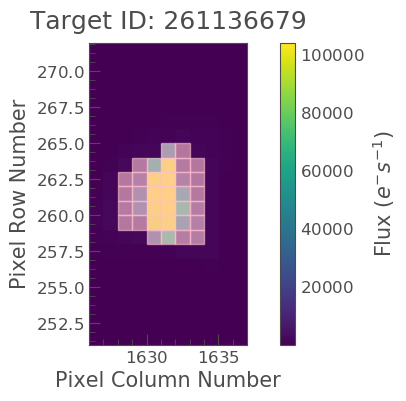

In [14]:
import numpy as np

# Create a median image of the source over time
median_image = np.nanmedian(tpf.flux, axis=0)

# Select pixels which are brighter than the 85th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 85)

# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

In [15]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)

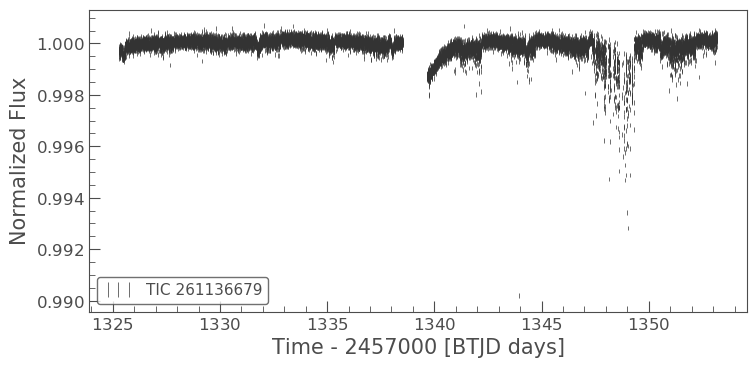

In [16]:
lc.errorbar();

There's a long term trend in this dataset, which we can remove with a simple smoothing filter. You can use the `lc.flatten()` method to apply and divide the [Savitzky-Golay smoothing filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter). Here we'll use a `window_length` of 1001 cadences, which is roughly a 5% of the full length of the light curve. 

In [17]:
# Number of cadences in the full light curve
print(lc.time.shape)

(18104,)


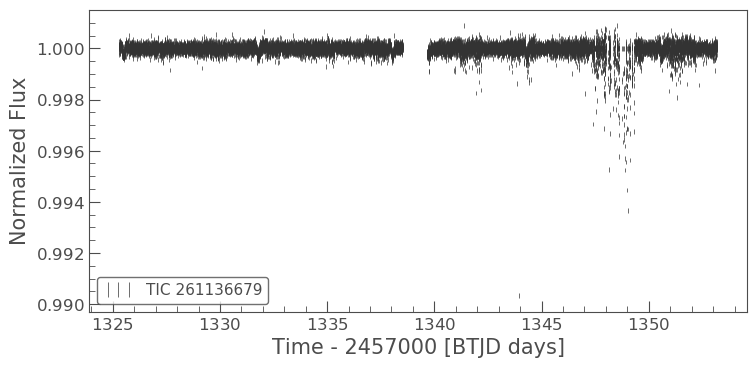

In [18]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();

The light curve looks much flatter. Unfortunately there is a portion of the light curve that is very noisy, due to a jitter in the TESS spacecraft. We can remove this simply by masking the light curve. First we'll select the times that had the jitter.

In [19]:
# Flag the times that are good quality
mask = (flat_lc.time < 1346) | (flat_lc.time > 1350)

Then we can just clip those times out.

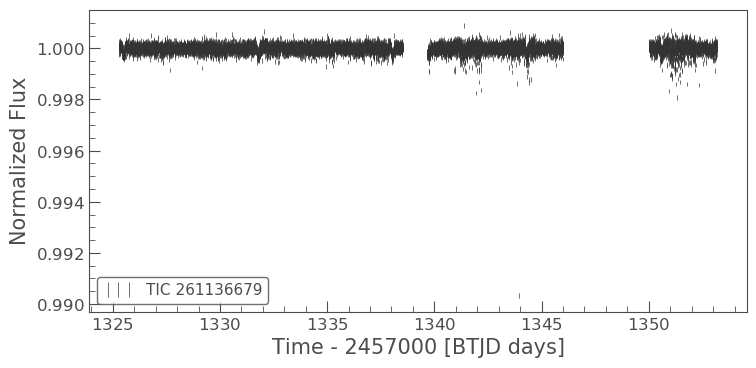

In [20]:
masked_lc = flat_lc[mask]
masked_lc.errorbar();

We can use *Lightkurve* to plot these two light curves over each other to see the difference. 

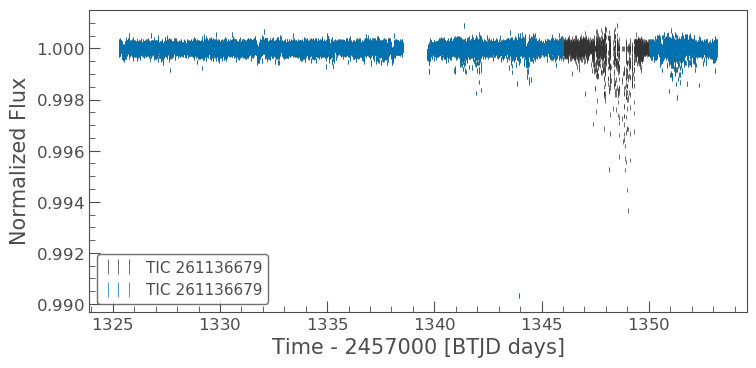

In [21]:
# First define the `matplotlib.pyplot.axes`
ax = flat_lc.errorbar()

# Pass that axis to the next plot
masked_lc.errorbar(ax=ax);

This looks much better. Now we might want to clip out some outliers from the light curve. We can do that with a simple lightkurve function `remove_outliers()`

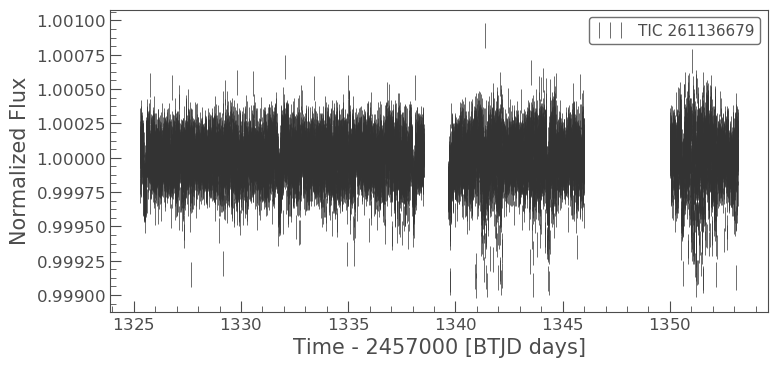

In [22]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.errorbar();

It's a little hard to see these data because of the plotting style. Let's use a scatter plot instead. We can do this with the `lc.scatter()` method. This method works in the same way that `matplotlib.pyplot.scatter` works, and takes in the same keyword arguments.

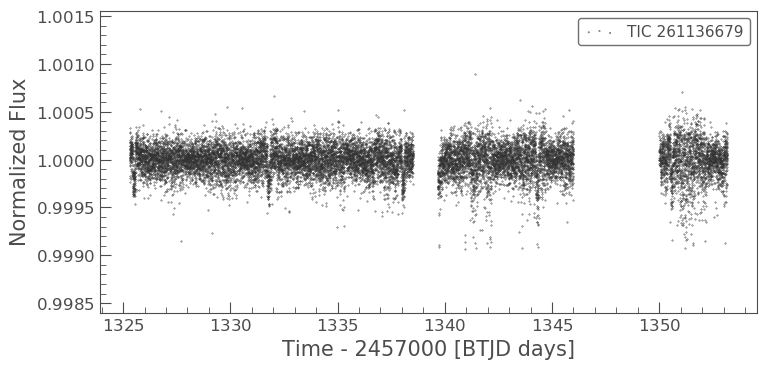

In [23]:
clipped_lc.scatter(s=0.1);

We can also add errorbars using the `lc.errorbar()` method.

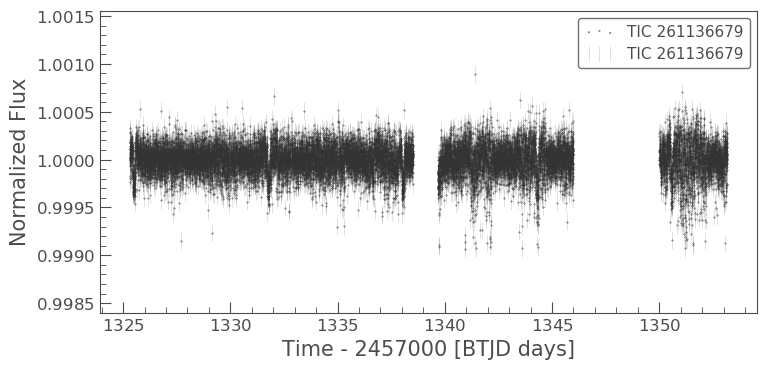

In [24]:
ax = clipped_lc.scatter(s=0.1)
clipped_lc.errorbar(ax=ax, alpha=0.2);  # alpha determines the transparency

Finally let's use `lightkurve` to fold the data at the exoplanet orbital period and see if we can see the transit.

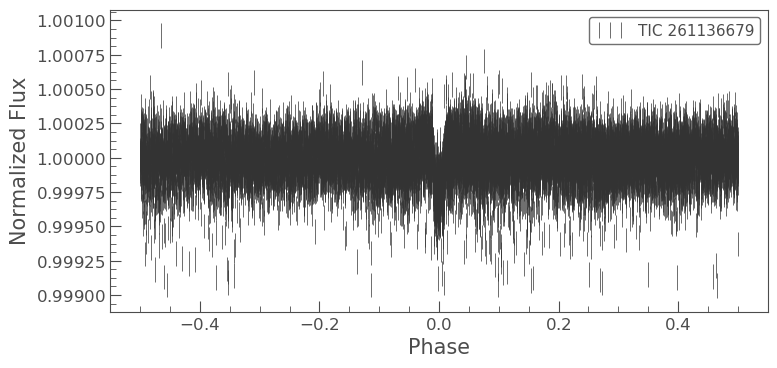

In [25]:
folded_lc = clipped_lc.fold(period=6.27, t0=1325.504)
folded_lc.errorbar();

It looks like there's something there, but it's hard to see. Let's bin the light curve to reduce the number of points, but also reduce the uncertainty of those points.

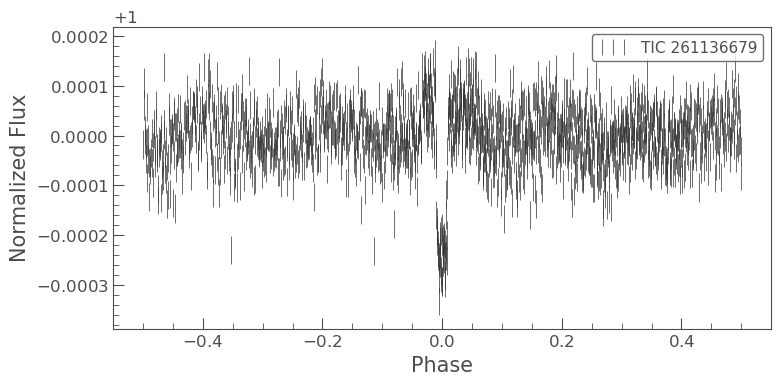

In [26]:
binned_lc = folded_lc.bin(binsize=10)  # Average 10 points per bin
binned_lc.errorbar();

And now we can see the transit of Pi Men c! 

Note that you can actually do all these steps in just a few lines:

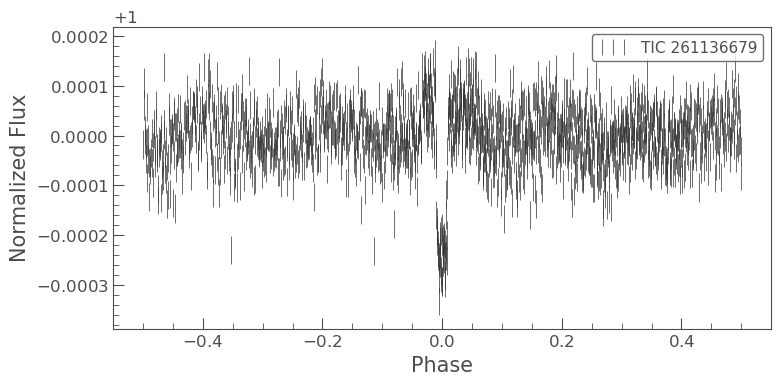

In [28]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)
lc = lc[(lc.time < 1346) | (lc.time > 1350)]
lc.remove_outliers(sigma=6).fold(period=6.27, t0=1325.504).bin(binsize=10).errorbar();

## Comparing two apertures

In the above tutorial we used our own aperture instead of the pipeline aperture. Let's compare the results from using these two different apertures.

In [30]:
# Use the default
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask).flatten(window_length=1001)
lc = lc[(lc.time < 1346) | (lc.time > 1350)].remove_outliers(6).fold(period=6.27, t0=1325.504).bin(10)

# Use a custom aperture
custom_lc = tpf.to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)
custom_lc = custom_lc[(custom_lc.time < 1346) | (custom_lc.time > 1350)].remove_outliers(6).fold(period=6.27, t0=1325.504).bin(10)

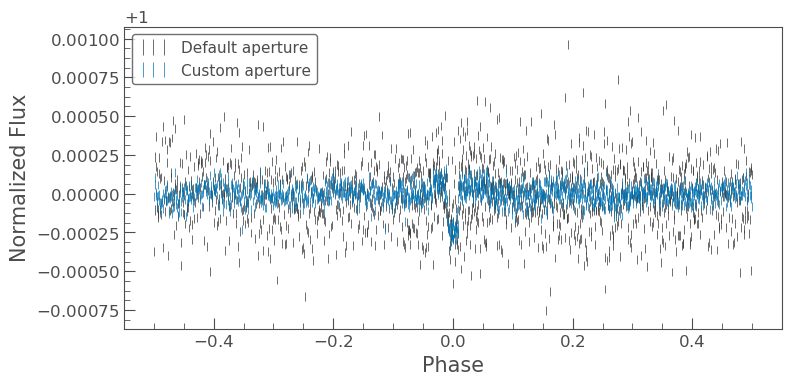

In [31]:
ax = lc.errorbar(label='Default aperture')
custom_lc.errorbar(ax=ax, label='Custom aperture');

The importance of using different aperture masks is clearly visible in the figure above.  Note however that the data archive at MAST also contains lightcurve products which have more advanced systematics removal methods applied.  We will explore those in a future tutorial!